In [5]:
import sys
sys.path.append('/Users/Daniel/OneDrive - C- ANALISIS SAS/programacion/funciones')

#Se importan todos los archivos necesarios para hacer mapas
from importaciones_mapas import *
import mapas
import reportlab
from reportlab.pdfgen import canvas

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

import municipales

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
import tempfile

In [3]:
OneDrive = '/Users/Daniel/OneDrive - C- ANALISIS SAS/'

In [4]:
paths = mapas.diccionario_rutas(path_OneDrive=OneDrive)

/Users/Daniel/OneDrive - C- ANALISIS SAS/


In [5]:
cod_mpio = '54810'

In [6]:
def crear_pdf_reporte_municipal(cod_mpio):
    
    """
    Retorna un mapa de diagnóstico del municipio seleccionado
    Parameters:
    -----------
        cod_mpio (str): Código del municipio en formato string. filename: str or path-like or file-like  A path, or a Python file-like object, or possibly some backend-dependent object such as `matplotlib.backends.backend_pdf.PdfPages`. Default is reporte_municipal_{nombre municipio código}
    
    """
    
    #Extrar shape, nombre y departamento para crear título
    
    row= mapas.indice_municipio(cod_mpio, path_OneDrive=OneDrive)
    df = mapas.cargar_capa_individual(paths['municipios'], rows=slice(row-1,row))
    municipio = df['NOMB_MPIO'].iloc[0].capitalize()
    depto = df['NOM_DEP'].iloc[0].capitalize()
    title = 'Reporte del municipio de {}, {} ({})'.format(municipio, depto, cod_mpio)
    mpios = pd.read_excel(paths['divipola'], converters={'MPIO_CCDGO':str,'DPTO_CCDGO':str }) #codigos de municipos
    
    #Se crea el archivo PDF
    my_canvas = canvas.Canvas('reporte_municipal_{}_{}_{}.pdf'.format(municipio,depto,cod_mpio))
    my_canvas.drawString(150, 750, "Reporte muncipal de {}, {} ({})".format(municipio,depto,cod_mpio))
    
    #Se crea el directorio temporal para guardar los archivos de imágenes ahí
    carpeta = tempfile.TemporaryDirectory()
    
    return my_canvas, carpeta

In [7]:
reporte, carpeta = crear_pdf_reporte_municipal(cod_mpio)

/Users/Daniel/OneDrive - C- ANALISIS SAS/


In [8]:
#Se agrega el mapa a al pdf
def agregar_mapa_municipal(cod_mpio, OneDrive, reporte, carpeta):
    
    ruta = carpeta.name+'mapa_municipal.png'
    mapas.mapa_municipal(cod_mpio, OneDrive, año=2020, filename=ruta)
    reporte.drawImage(ruta, 100, 250, width=400, height=500)  

/Users/Daniel/OneDrive - C- ANALISIS SAS/
/Users/Daniel/OneDrive - C- ANALISIS SAS/
/Users/Daniel/OneDrive - C- ANALISIS SAS/


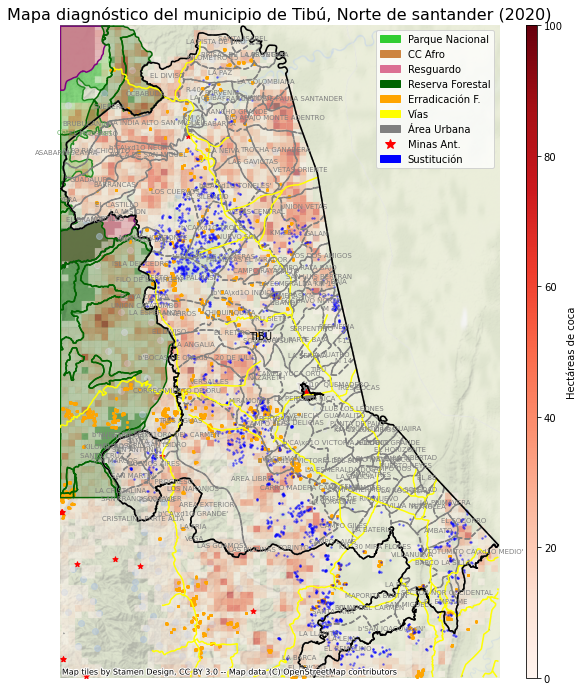

In [9]:

agregar_mapa_municipal(cod_mpio, OneDrive, reporte, carpeta)

In [11]:
vrds = gpd.read_file(paths['vrds'])

In [12]:
ruta = carpeta.name+'graf_coca_municipal.png'

<AxesSubplot:title={'center':'Hectáreas de coca en el municipio de TIBÚ'}, xlabel='ano', ylabel='Hectáreas'>

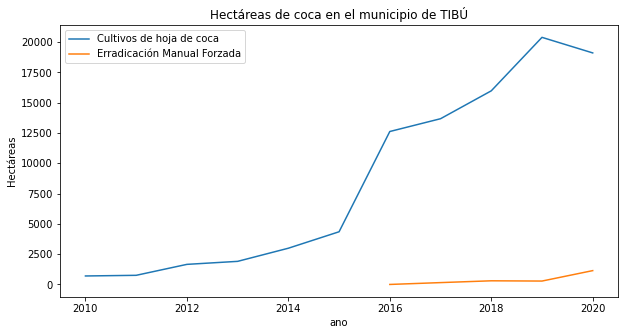

In [13]:
municipales.grafica_coca_municipio(cod_mpio, vrds, emf=True, file_name='.')

In [19]:
mpios = pd.read_excel(paths['divipola'], converters={'MPIO_CCDGO':str,'DPTO_CCDGO':str })

In [21]:
import pandas as pd
import os

def diccionario_rutas(programacion_path, geoinfo_path):
    """
    Reads an Excel file containing paths and replaces the first part of each path 
    based on whether it begins with 'programacion' or 'geoinfo'. 
    
    The modified paths are then combined with a specified base path.

    Parameters:
    - programacion_path (str): The path to 'programacion' folder from Métodos Mixtos.
    - geoinfo_path (str): The path to 'geoinfo' folder from Métodos Mixtos.
    
    Returns:
    - dict: A dictionary with keys from the Excel file and modified paths as values.
    """
    archivo_rutas = 'rutas.xlsx'
    
    # Read the Excel file using openpyxl
    df = pd.read_excel(archivo_rutas, engine='openpyxl')
    
    def replace_path(value):
        """Replace the prefix of the path based on its starting string."""
        if value.startswith('programacion'):
            return value.replace('programacion', programacion, 1)
        elif value.startswith('geoinfo'):
            return value.replace('geoinfo', geoinfo, 1)
        return value  # Return unchanged if it doesn't match

    df['Path'] = df['Path'].apply(replace_path)  # Apply the replacement function
    df['Path'] = df['Path'].apply(lambda x: os.path.join(x))  # Append the base path
    paths = dict(zip(df['Key'], df['Path']))
    
    return paths
